## **Importing Libraries**

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [2]:
!pip install --upgrade --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

In [1]:
from sklearn.datasets import fetch_20newsgroups
# from nltk.tokenize import word_tokenize #Used to extract words from documents
# from nltk.stem import WordNetLemmatizer #Used to lemmatize words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import sys
from time import time

import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import seaborn as sns
from sklearn.metrics import silhouette_score
from collections import Counter
from sklearn.cluster import AgglomerativeClustering

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


## **Reading 20 Newsgroups Dataset**

In [3]:
# Selected 3 categories from the 20 newsgroups dataset

categories = [
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

print("Loading 20 newsgroups dataset for categories:")
print(categories)

Loading 20 newsgroups dataset for categories:
['talk.religion.misc', 'comp.graphics', 'sci.space']


In [4]:
df = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=False, remove=('headers', 'footers', 'quotes'))

In [5]:
df.data[0]

'\n\nI think I can. Largely as a result of efforts by people reading this group\nwriting letters and making phone calls the following has happened:\n\n1. NASA reprogrammed funds to keep NASP alive in 1991.\n2. Efforts to kill DC-X and the SSRT progam where twice twarted\n   (Feb. and June of last year).\n3. Gouldin kept his job in spite of heavy lobbying against him.\n\nThis may not be what Mark was thinking of but it shows that the\nreaders of sci.space DO have power and influence.\n\n  Allen\n'

In [6]:
df = pd.DataFrame({'text': df.data, 'target': df.target})

In [7]:
df.target.value_counts()

,count
target,
1,987
0,973
2,628


In [8]:
df.isna().sum()

,0
text,0
target,0


In [9]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)

    # Convert to lowercase
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Join back into a single string
    return ' '.join(tokens)

# Apply preprocessing to all documents
cleaned_documents = [preprocess_text(doc) for doc in df['text']]


In [11]:
vectorizer = TfidfVectorizer(max_features=5000)

In [12]:
X_tfidf = vectorizer.fit_transform(cleaned_documents)

In [54]:
print(X_tfidf)

  (0, 4468)	0.17121957664354934
  (0, 2553)	0.12510940935837014
  (0, 3758)	0.1255843629189277
  (0, 1503)	0.2968969655236194
  (0, 3301)	0.09252282733019285
  (0, 3642)	0.10172112354294446
  (0, 2039)	0.11309887794977778
  (0, 4943)	0.11596444141449813
  (0, 2614)	0.16329299118369747
  (0, 2740)	0.09041104033152896
  (0, 3346)	0.1562452661861489
  (0, 792)	0.10528699108213418
  (0, 1822)	0.10777312912760015
  (0, 2079)	0.1280725637156982
  (0, 2983)	0.1224005657906304
  (0, 1894)	0.14429279921006677
  (0, 2490)	0.12418040660286807
  (0, 2986)	0.2104051452247457
  (0, 353)	0.17237908899572907
  (0, 2509)	0.14517018386772496
  (0, 1253)	0.18077100904914564
  (0, 4208)	0.21412518302011888
  (0, 4628)	0.18851291180530932
  (0, 1747)	0.20707745802257027
  (0, 2482)	0.17034071618124608
  :	:
  (2586, 4224)	0.16617889011318074
  (2586, 3365)	0.23753000324808032
  (2586, 1954)	0.19207968108697365
  (2586, 2336)	0.20262953625963726
  (2586, 3391)	0.21344181074262986
  (2586, 1391)	0.3832675300

In [15]:
tokenized_docs = [word_tokenize(doc) for doc in cleaned_documents]

In [16]:
word2vec_model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=2, workers=4)

In [17]:
print(word2vec_model.wv['space'])

[-1.9276546   1.4265258  -0.11506242 -0.29903466  0.6385627   0.2794472
  0.10400502  1.5951529  -1.0963953   0.6528934  -0.79299057 -0.3436979
 -0.05979309  0.88633776  1.1263276  -0.73366475  0.69344634  0.08107814
 -0.8821067  -1.4210081  -0.64947736 -0.45703456  0.8374348  -0.03526866
  0.68159705  0.07787985 -0.5112857   0.13361122 -0.94774926  0.04354724
  0.8903061  -0.06755354 -1.0288925  -0.5996873  -0.27673158  0.06432064
 -0.511434   -0.09866457 -0.45716238 -0.9324904  -0.79129875 -0.09006731
 -0.16171557  0.98306406  0.43111774 -0.3494682  -0.29501277  0.10323704
  0.17316605  0.42472512  0.2340105  -0.8272804  -1.2653617  -0.22125311
 -1.2407788   0.26317355  0.34083283 -1.1025846  -1.188441    0.01801999
  0.28160092 -0.3422244   0.36557764  0.1237311  -0.8036635   0.7700423
  0.7533719   1.23783    -0.35683456  0.5343309   0.04201674  1.5448711
  0.81930965  0.06273692  0.37922573  1.1216708   0.04882589  0.7787222
 -1.1853205   0.16648935 -0.03209827 -0.9573566   0.2570

<ipython-input-53-2174c36f5add>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels_kmeans, palette="viridis")


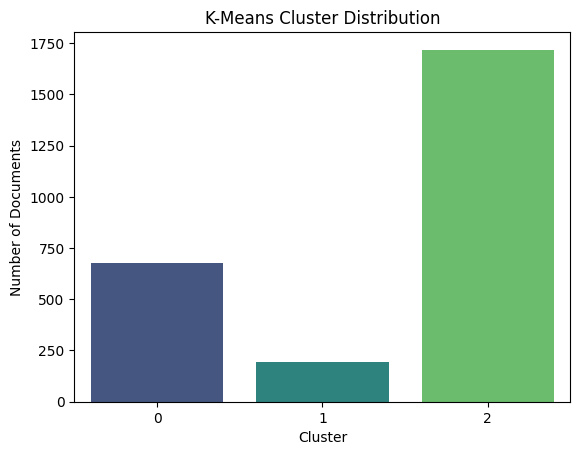

In [53]:
# Set number of clusters (k)
k = 3

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=1234, n_init=200)
labels_kmeans = kmeans.fit_predict(X_tfidf)

# Plot cluster distribution
sns.countplot(x=labels_kmeans, palette="viridis")
plt.title("K-Means Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Documents")
plt.show()


In [36]:
# Compute Silhouette Score for K-Means
silhouette_kmeans = silhouette_score(X_tfidf, labels_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_kmeans:.4f}")



Silhouette Score for K-Means: 0.0097


In [29]:
def purity_score(y_true, y_pred):
    contingency_matrix = np.zeros((np.max(y_pred) + 1, np.max(y_true) + 1))

    for i in range(len(y_true)):
        contingency_matrix[y_pred[i], y_true[i]] += 1

    return np.sum(np.max(contingency_matrix, axis=1)) / np.sum(contingency_matrix)

# Get true labels from dataset
true_labels = df.target

# Compute Purity Score
purity_kmeans = purity_score(true_labels, labels_kmeans)


print(f"Purity Score for K-Means: {purity_kmeans:.4f}")



Purity Score for K-Means: 0.6511


In [30]:
# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
labels_hierarchical = hierarchical.fit_predict(X_tfidf.toarray())




In [31]:
silhouette_hierarchical = silhouette_score(X_tfidf.toarray(), labels_hierarchical)
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.4f}")


Silhouette Score for Hierarchical Clustering: 0.0094


In [32]:
purity_hierarchical = purity_score(true_labels, labels_hierarchical)
print(f"Purity Score for Hierarchical Clustering: {purity_hierarchical:.4f}")

Purity Score for Hierarchical Clustering: 0.6615


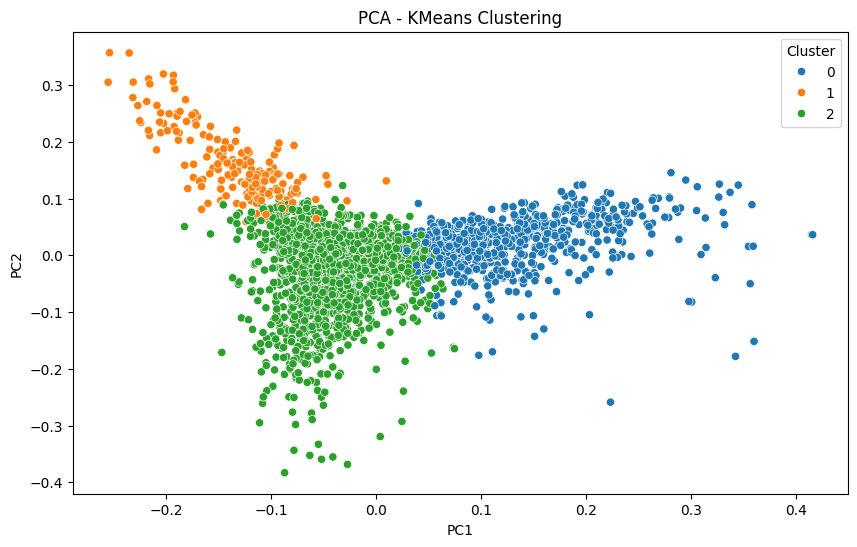

In [48]:

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_tfidf.toarray())


plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_kmeans, palette='tab10')
plt.title("PCA - KMeans Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

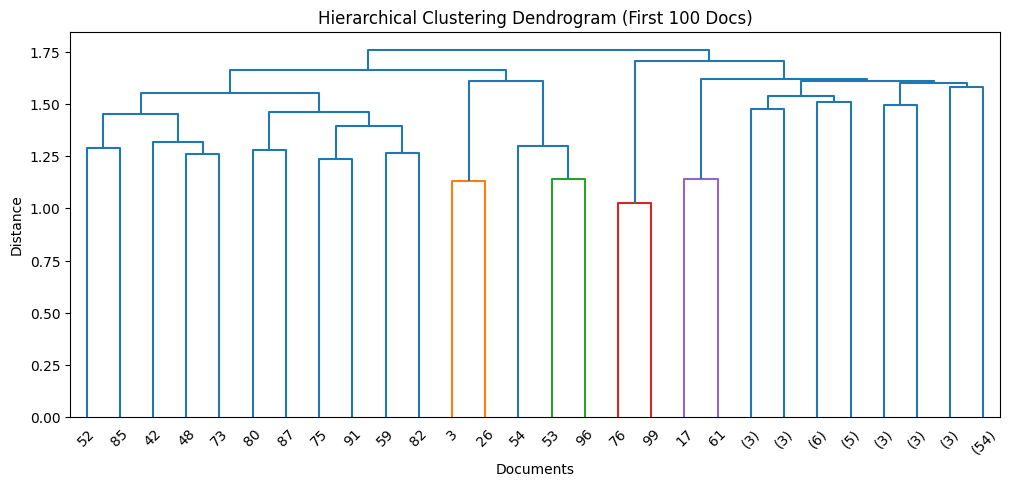

In [41]:
# Compute linkage matrix for dendrogram (first 100 samples)
subset = X_tfidf[:100].toarray()
linkage_matrix = linkage(subset, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 5))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (First 100 Docs)")
plt.xlabel("Documents")
plt.ylabel("Distance")
plt.show()


## **Redaing PeopleWiki Datset**

In [ ]:
#We will retrieve the Wikipedia Articles Dataset
dataset = 'Dataset/people_wiki.csv'
people_wiki_df = pd.read_csv(dataset)
#Lets see what we have in the dataset
people_wiki_df.head(3)

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
